In [1]:
#Reading the Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data=pd.read_csv(r'Datasets\Final Datasets\Linear.csv')

In [7]:
Y=data['GDP']
X=data.drop(['GDP','DATE'],axis=1)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)


In [22]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)
model=SVR()
model.fit(X_train,Y_train)

SVR()

In [23]:
Y_pred=model.predict(X_test)
#Evaluating the Model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mse=mean_absolute_error(Y_test,Y_pred)
r2=r2_score(Y_test,Y_pred)
print(mse)
print(r2)


3741.1683735477727
0.42590812740175776


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....................kernel=linear;, score=0.997 total time=   3.5s
[CV 2/5] END .....................kernel=linear;, score=0.997 total time=   3.4s
[CV 3/5] END .....................kernel=linear;, score=0.997 total time=   3.5s
[CV 4/5] END .....................kernel=linear;, score=0.997 total time=   3.4s
[CV 5/5] END .....................kernel=linear;, score=0.997 total time=   3.4s
[CV 1/5] END ........................kernel=rbf;, score=0.332 total time=   5.6s
[CV 2/5] END ........................kernel=rbf;, score=0.348 total time=   5.7s
[CV 3/5] END ........................kernel=rbf;, score=0.355 total time=   5.7s
[CV 4/5] END ........................kernel=rbf;, score=0.351 total time=   5.6s
[CV 5/5] END ........................kernel=rbf;, score=0.349 total time=   5.6s
[CV 1/5] END .......................kernel=poly;, score=0.845 total time=   3.4s
[CV 2/5] END .......................kernel=poly;,

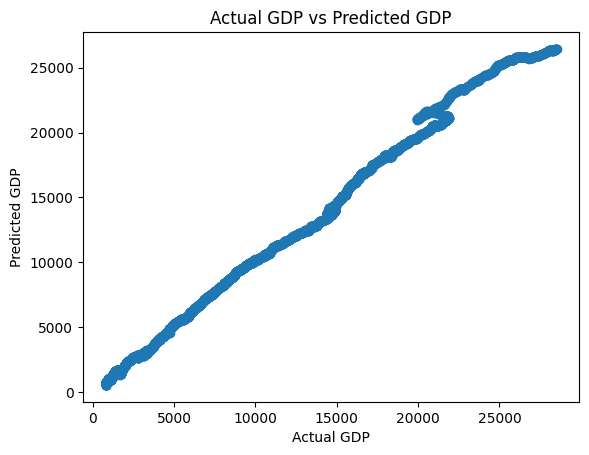

In [24]:
parameters={
            'kernel':['linear','rbf','poly','sigmoid']
            }
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(model,parameters,verbose=3)
grid.fit(X_train,Y_train)
print(grid.best_params_)
print(grid.best_score_)
Y_pred=grid.predict(X_test)
mse=mean_absolute_error(Y_test,Y_pred)
r2=r2_score(Y_test,Y_pred)
print(mse)
print(r2)
#Visualizing the Results
plt.scatter(Y_test,Y_pred)
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual GDP vs Predicted GDP')
plt.show()


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .............degree=2, kernel=poly;, score=0.076 total time=   3.3s
[CV 2/5] END .............degree=2, kernel=poly;, score=0.107 total time=   3.2s
[CV 3/5] END .............degree=2, kernel=poly;, score=0.099 total time=   3.3s
[CV 4/5] END .............degree=2, kernel=poly;, score=0.103 total time=   3.2s
[CV 5/5] END .............degree=2, kernel=poly;, score=0.105 total time=   3.2s
[CV 1/5] END .............degree=3, kernel=poly;, score=0.845 total time=   3.4s
[CV 2/5] END .............degree=3, kernel=poly;, score=0.857 total time=   3.4s
[CV 3/5] END .............degree=3, kernel=poly;, score=0.843 total time=   3.5s
[CV 4/5] END .............degree=3, kernel=poly;, score=0.851 total time=   3.4s
[CV 5/5] END .............degree=3, kernel=poly;, score=0.852 total time=   3.4s
[CV 1/5] END .............degree=4, kernel=poly;, score=0.450 total time=   3.3s
[CV 2/5] END .............degree=4, kernel=poly;,

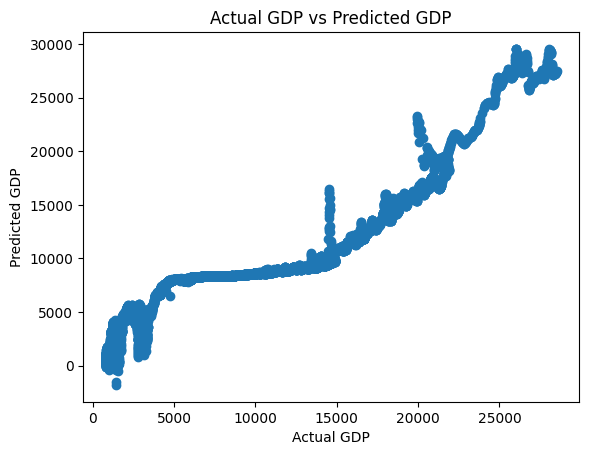

In [25]:
parameters={
            'kernel':['poly'],
            'degree':[2,3,4,5]
            }
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(model,parameters,verbose=3)
grid.fit(X_train,Y_train)
print(grid.best_params_)
print(grid.best_score_)
Y_pred=grid.predict(X_test)
mse=mean_absolute_error(Y_test,Y_pred)
r2=r2_score(Y_test,Y_pred)
print(mse)
print(r2)
#Visualizing the Results
plt.scatter(Y_test,Y_pred)
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual GDP vs Predicted GDP')
plt.show()

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END C=0.1, epsilon=0.1, kernel=linear, tol=0.001;, score=0.848 total time=   3.4s
[CV 2/5] END C=0.1, epsilon=0.1, kernel=linear, tol=0.001;, score=0.854 total time=   3.4s
[CV 3/5] END C=0.1, epsilon=0.1, kernel=linear, tol=0.001;, score=0.856 total time=   3.4s
[CV 4/5] END C=0.1, epsilon=0.1, kernel=linear, tol=0.001;, score=0.855 total time=   3.3s
[CV 5/5] END C=0.1, epsilon=0.1, kernel=linear, tol=0.001;, score=0.854 total time=   3.4s
[CV 1/5] END C=0.1, epsilon=0.1, kernel=linear, tol=0.01;, score=0.848 total time=   3.4s
[CV 2/5] END C=0.1, epsilon=0.1, kernel=linear, tol=0.01;, score=0.854 total time=   3.4s
[CV 3/5] END C=0.1, epsilon=0.1, kernel=linear, tol=0.01;, score=0.856 total time=   3.4s
[CV 4/5] END C=0.1, epsilon=0.1, kernel=linear, tol=0.01;, score=0.855 total time=   3.4s
[CV 5/5] END C=0.1, epsilon=0.1, kernel=linear, tol=0.01;, score=0.854 total time=   3.3s
[CV 1/5] END C=0.1, epsilon=0.1, 

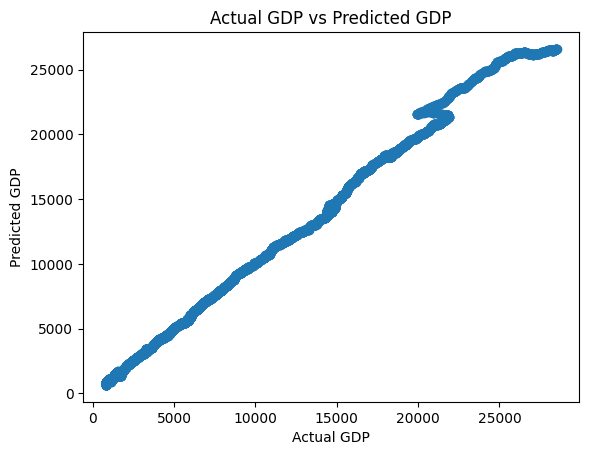

In [26]:
parameters={
            'kernel':['linear'],
            'tol':[0.001,0.01,0.1,1],
            'C':[0.1,1,10,100],
            'epsilon':[0.1,0.2,0.3,0.4,0.5]
            }
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(model,parameters,verbose=3)
grid.fit(X_train,Y_train)
print(grid.best_params_)
print(grid.best_score_)
Y_pred=grid.predict(X_test)
mse=mean_absolute_error(Y_test,Y_pred)
r2=r2_score(Y_test,Y_pred)
print(mse)
print(r2)
#Visualizing the Results
plt.scatter(Y_test,Y_pred)
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual GDP vs Predicted GDP')
plt.show()

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END C=10, epsilon=0.1, kernel=linear, tol=1;, score=0.998 total time=   3.6s
[CV 2/5] END C=10, epsilon=0.1, kernel=linear, tol=1;, score=0.998 total time=   3.6s
[CV 3/5] END C=10, epsilon=0.1, kernel=linear, tol=1;, score=0.998 total time=   3.6s
[CV 4/5] END C=10, epsilon=0.1, kernel=linear, tol=1;, score=0.998 total time=   3.6s
[CV 5/5] END C=10, epsilon=0.1, kernel=linear, tol=1;, score=0.998 total time=   3.6s
[CV 1/5] END C=10, epsilon=0.1, kernel=linear, tol=5;, score=0.998 total time=   3.6s
[CV 2/5] END C=10, epsilon=0.1, kernel=linear, tol=5;, score=0.998 total time=   3.6s
[CV 3/5] END C=10, epsilon=0.1, kernel=linear, tol=5;, score=0.998 total time=   3.6s
[CV 4/5] END C=10, epsilon=0.1, kernel=linear, tol=5;, score=0.998 total time=   3.6s
[CV 5/5] END C=10, epsilon=0.1, kernel=linear, tol=5;, score=0.998 total time=   3.6s
[CV 1/5] END C=10, epsilon=0.1, kernel=linear, tol=10;, score=0.998 total time= 

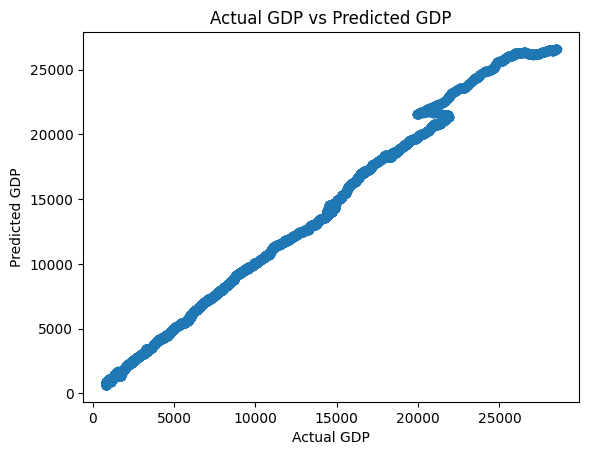

In [27]:
parameters={
            'kernel':['linear'],
            'tol':[1,5,10],
            'C':[10],
            'epsilon':[0.1,0.05,0.001]
            }
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(model,parameters,verbose=3)
grid.fit(X_train,Y_train)
print(grid.best_params_)
print(grid.best_score_)
Y_pred=grid.predict(X_test)
mse=mean_absolute_error(Y_test,Y_pred)
r2=r2_score(Y_test,Y_pred)
print(mse)
print(r2)
#Visualizing the Results
plt.scatter(Y_test,Y_pred)
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual GDP vs Predicted GDP')
plt.show()

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END C=10, epsilon=0.1, kernel=linear, tol=1;, score=-111551.075 total time=   3.6s
[CV 2/5] END C=10, epsilon=0.1, kernel=linear, tol=1;, score=-119118.598 total time=   3.7s
[CV 3/5] END C=10, epsilon=0.1, kernel=linear, tol=1;, score=-115618.790 total time=   3.5s
[CV 4/5] END C=10, epsilon=0.1, kernel=linear, tol=1;, score=-109482.927 total time=   3.5s
[CV 5/5] END C=10, epsilon=0.1, kernel=linear, tol=1;, score=-117385.254 total time=   3.6s
[CV 1/5] END C=10, epsilon=0.1, kernel=linear, tol=5;, score=-111587.229 total time=   3.5s
[CV 2/5] END C=10, epsilon=0.1, kernel=linear, tol=5;, score=-119116.098 total time=   3.5s
[CV 3/5] END C=10, epsilon=0.1, kernel=linear, tol=5;, score=-115540.634 total time=   3.5s
[CV 4/5] END C=10, epsilon=0.1, kernel=linear, tol=5;, score=-109366.196 total time=   3.6s
[CV 5/5] END C=10, epsilon=0.1, kernel=linear, tol=5;, score=-117419.439 total time=   3.6s
[CV 1/5] END C=10, e

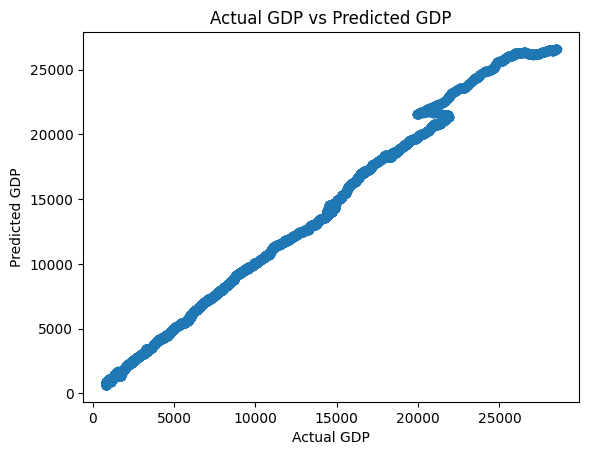

In [30]:

parameters={
            'kernel':['linear'],
            'tol':[1,5,10],
            'C':[10],
            'epsilon':[0.1,0.05,0.001]
            }
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(model,parameters,verbose=3,cv=5,scoring='neg_mean_squared_error')
grid.fit(X_train,Y_train)
print(grid.best_params_)
print(grid.best_score_)
Y_pred=grid.predict(X_test)
mse=mean_absolute_error(Y_test,Y_pred)
r2=r2_score(Y_test,Y_pred)
r2t=r2_score(Y_train,grid.predict(X_train))
print(mse)
print(r2)
print(r2t)
#Visualizing the Results
plt.scatter(Y_test,Y_pred)
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual GDP vs Predicted GDP')
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
print(mse)

111965.56934017585
